# House Price Analysis

The dataset we work on contains house prices and the features of each house. The primary task is to find the single field in dataset.cv that best describes the house sales price and explain why.

First, load the dataset.csv and display all the columns of the dataframe to check all the features available.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler

print('Load the data...')
df = pd.read_csv('dataset.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 8)
df

Load the data...


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


## EDA
This is the part where the data are examined with the purpose of getting a better understanding of what we have in hand. We check the description of the data first, e.g. number of non-missing values and data type. 

We then check the correlation between each of the dependant variable and the target variable, SalePrice. As there are 80 dependant variables, we will only study features that show the highest correlation with SalePrice.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
corr = df.corr()
pd.set_option('display.max_rows', None)
print (corr['SalePrice'].sort_values(ascending=False)[:10], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-10:])

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


The 10 features most positively correlated and 10 features most negatively correlated to the target variable are ranked and shown above. In general, features with positive correlation have more impact on the sale price, e.g. the higher the overall quality of the house, the higher the sale price.

Now, let's visualize the features obtained above!

<function matplotlib.pyplot.show(*args, **kw)>

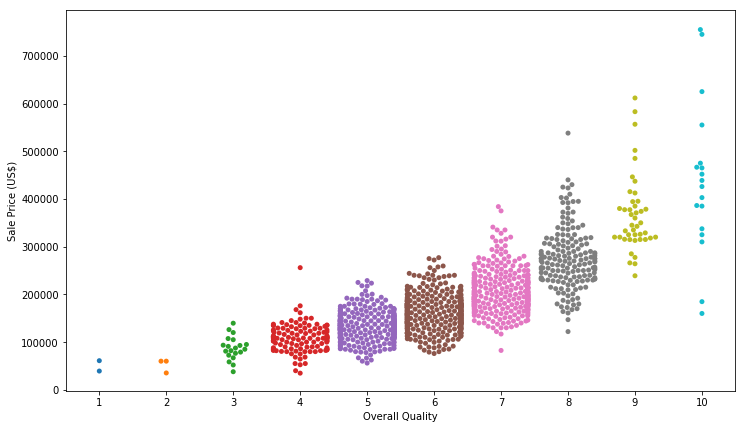

In [125]:
# OveralQual vs. SalePrice 
plt.rcParams['figure.figsize'] = (12, 7)
sns.swarmplot(x="OverallQual", y="SalePrice", data=df)
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price (US$)")
plt.show

With almost 0.8 correlation score, the overall quality of the house seems like a good indicator of the sale price. The sale price rises as the quality ascends gradually. However, there is a big price range when the quality is 10, i.e. from under 200,000 USD to above 700,000 USD. Let's examine further into this.

In [5]:
corr_feat = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 
           'YearBuilt', 'SalePrice']
df_corr = df[corr_feat]
df_corr.loc[df_corr['OverallQual'] == 10].sort_values('SalePrice')

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,SalePrice
1298,10,5642,2,1418,6110,4692,2,12,2008,160000
523,10,4676,3,884,3138,3138,3,11,2007,184750
1442,10,2007,3,812,1017,1026,2,10,2008,310000
583,10,2775,2,880,1237,1521,3,9,1893,325000
994,10,1718,3,786,1700,1718,2,7,2006,337500
825,10,2084,3,1220,2078,2084,2,7,2007,385000
224,10,2392,3,968,2392,2392,2,8,2003,386250
515,10,2020,3,900,2006,2020,2,9,2009,402861
389,10,2332,3,846,1682,1742,2,9,2007,426000
58,10,2945,3,641,1410,1426,3,10,2006,438780


From the above table, the combination of the selected features don't quite explain the low or high price. The house of the lowest price (160,00 USD) even has bigger area and more rooms than the most expensive house with 755,000 USD. This could be a data entry error, or an exception, or there is another feature that impacts the price that is not shown on the table above.

The median sale price of each quality level could be a better visualization than the swarmplot above. As the median is the value that is in the middle of a range, it is resistant to noise and outliers.

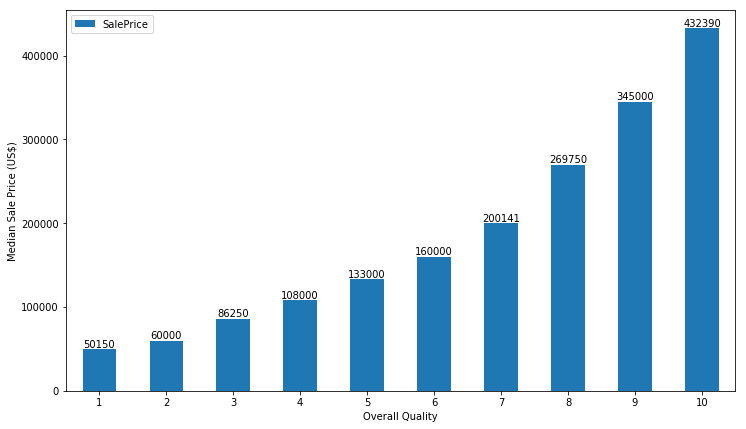

In [6]:
qual_pivot = df.pivot_table(index= 'OverallQual', values= 'SalePrice', aggfunc=np.median)
g = qual_pivot.plot(kind = 'bar')

for i in g.patches:
    height = i.get_height()
    g.text(i.get_x() + i.get_width()/2, 2000+height, str(i.get_height()), color="black", ha="center")

plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price (US$)')
plt.xticks(rotation = 0)
plt.show()

/home/tria/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<function matplotlib.pyplot.show(*args, **kw)>

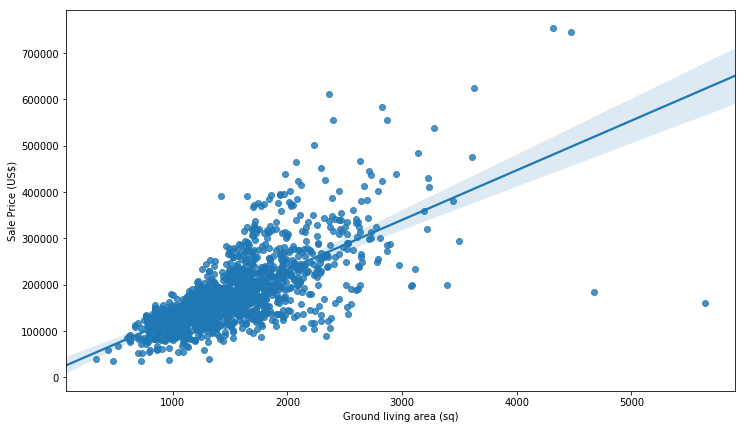

In [7]:
# GrLivArea vs. SalePrice
sns.regplot(x="GrLivArea", y="SalePrice", data=df)
plt.xlabel('Ground living area (sq)')
plt.ylabel('Sale Price (US$)')
plt.show

The ground living area, as the second highest correlated feature, shows also to be a good indicator of price, despite of the many points one can see on top of the regression line.  

<function matplotlib.pyplot.show(*args, **kw)>

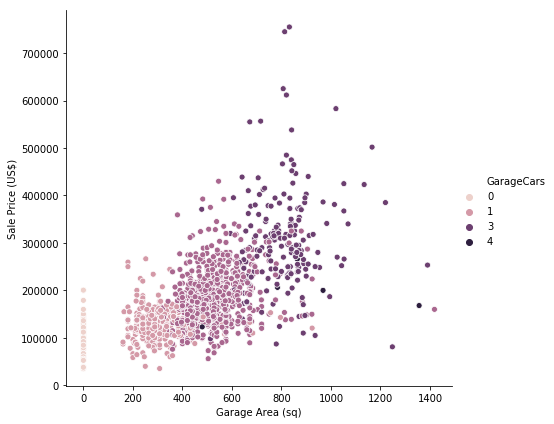

In [8]:
# Garage vs. SalePrice
g = sns.relplot(x="GarageArea", y="SalePrice", hue="GarageCars", height=6, aspect=1.1, data=df)
plt.xlabel('Garage Area (sq)')
plt.ylabel('Sale Price (US$)')
plt.show

There seems to be a visible correlation between garage area and number of cars and the sale price. However, after about 800 sq the dots are more dispersed. 

<function matplotlib.pyplot.show(*args, **kw)>

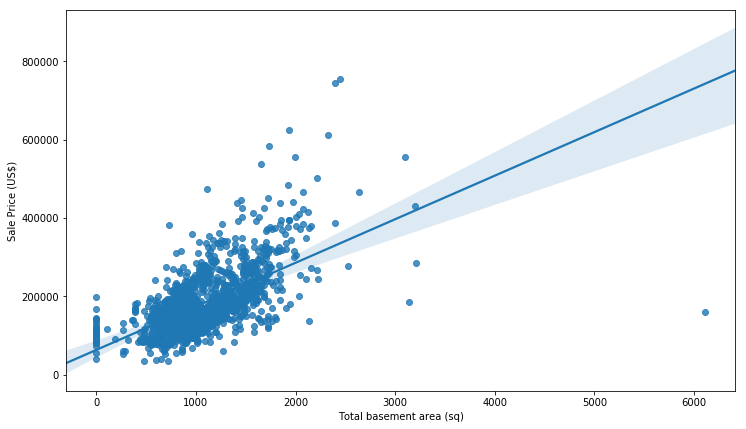

In [9]:
# Total basement area vs. SalePrice
sns.regplot(x="TotalBsmtSF", y="SalePrice", data=df)
plt.xlabel('Total basement area (sq)')
plt.ylabel('Sale Price (US$)')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

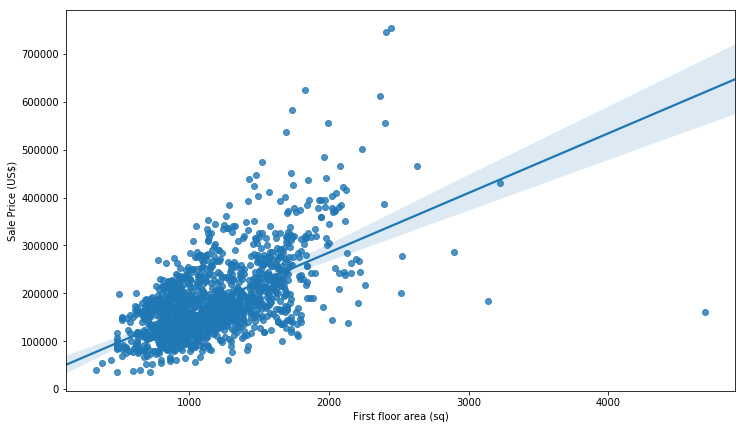

In [10]:
# First floor area vs. SalePrice
sns.regplot(x="1stFlrSF", y="SalePrice", data=df)
plt.xlabel('First floor area (sq)')
plt.ylabel('Sale Price (US$)')
plt.show

The price also rises with the rise of basement and first floor area. 

<function matplotlib.pyplot.show(*args, **kw)>

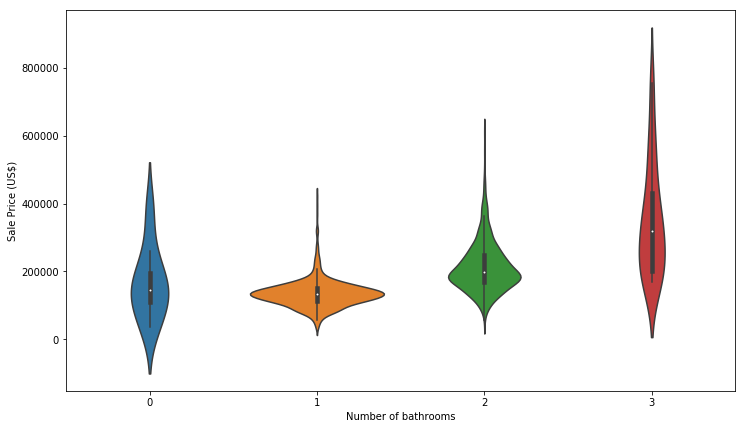

In [11]:
# Bathroom vs. SalePrice
sns.violinplot(x="FullBath", y="SalePrice", data=df)
plt.xlabel('Number of bathrooms')
plt.ylabel('Sale Price (US$)')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

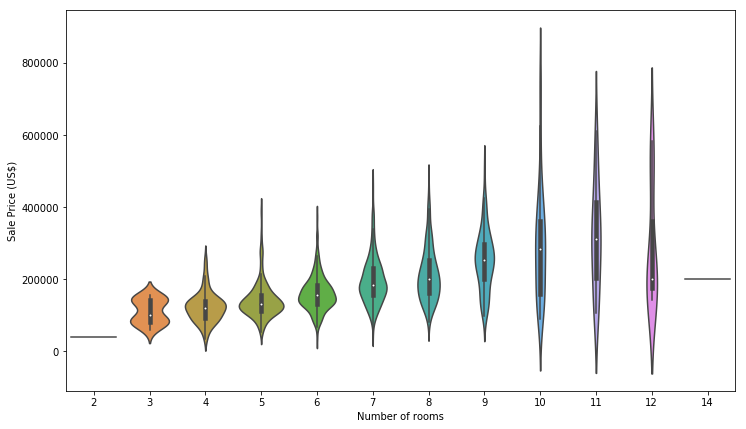

In [12]:
# Total number of rooms vs. SalePrice
sns.violinplot(x="TotRmsAbvGrd", y="SalePrice", data=df)
plt.xlabel('Number of rooms')
plt.ylabel('Sale Price (US$)')
plt.show

The number of rooms and bathrooms also influence the sale price. There is a considerably high price range for houses with 3 bathrooms or houses with more than 10 rooms. Both features don't describe the sale price as good as the previous plotted features.

In conclusion, the overall quality **(OverallQual)** field describes the sale price the best because it shows the highest correlation score with sale price and the sale price increases accordingly with the increase of the median of each quality level. However, there is quite a large price range among houses with quality level 10, which would make the sale price prediction of houses of this quality misleading when just using this feature.

**Bonus**

For comparison, I visualized the features dwellling type and street type with sale price. Both features don't have high correlation score. The type of dwelling 60 (2-STORY 1946 & NEWER) show the highest price, but the feature doesn't describe the sale price at all. With only 6 houses with gravel, the type of road access doesn't seem to influence the sale price.

<function matplotlib.pyplot.show(*args, **kw)>

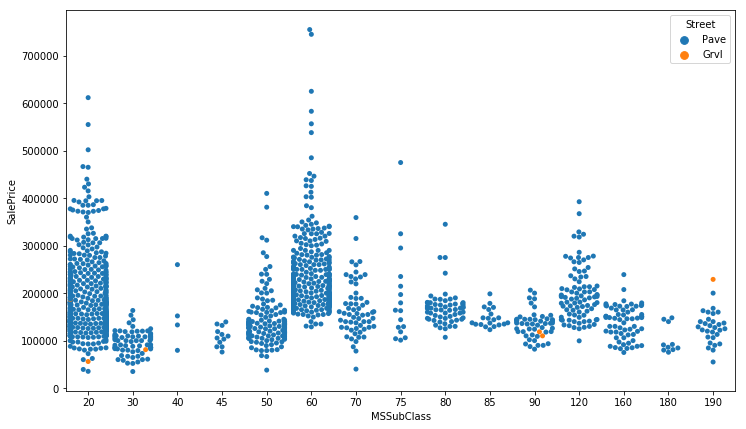

In [13]:
# MSSubClass vs. Street vs. SalePrice 
sns.swarmplot(x="MSSubClass", y="SalePrice", hue="Street", data=df)
plt.show

## Data Preprocessing

No data cleaning was necessary for the EDA, as there were no missing values in the features subject for examination above. The next step would be pre-processing the data before feeding them into machine learning models. 

There are 80 dependent variables, many of which don't show much correlation with the sale price. Narrowing down the features by selecting the relevant ones helps the ML model to perform better and reduce running time. Relevant features are the ones that:
- show high correlation with the target variable, and 
- independent from one another.

### Remove features that are higly correlation with each other
The function corr() used before can only be applied for numerical variables. It's a good start, even though we have to neglect the categorical variables first. We can take a look into them later.

I set 0.95 as the threshold for this step. That means, any two features with more than 0.95 correlation coefficient will be removed. 

In [3]:
# Remove dependent features that have correlation score of more than 0.95
df_colli = df.drop('SalePrice', axis=1)

def collinearity(df, threshold):
    drop_col = []
    coll_matrix = df.corr().abs()
    for i in range(len(coll_matrix.columns)):
        for j in range(i):
            if (coll_matrix.iloc[i,j] >= threshold) and (coll_matrix.columns[j] not in drop_col):
                col_name = coll_matrix.columns[i]
                drop_col.append(col_name)
                if col_name in df.columns:
                    del df[col_name]
    print('Dropped columns:', drop_col,'\n') 
    print('Shape new dataframe:', df.shape)
    
collinearity(df_colli, 0.95)


Dropped columns: [] 

Shape new dataframe: (1460, 80)


No dependent variables are highly correlated with each other.

### Remove least correlated features with sale price
I set 0.35 as the threshold for this step. That means, any feature with less than 0.3 correlation coefficient with SalePrice will be removed. 

In [4]:
# Remove dependent variables with less than 0.35 correlation score with sale price
df_num = df.select_dtypes(exclude='object')
to_drop= []
for column in df_num:
    if df_num.corr().abs()['SalePrice'][column] <= 0.35:
        to_drop.append(column)

df_highcorr = df.drop(df[to_drop], axis=1)
print('Dropped columns:', to_drop,'\n') 
print('Shape new dataframe:', df_highcorr.shape)

Dropped columns: ['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'] 

Shape new dataframe: (1460, 59)


Correlation study is done. 58 features remain. Almost 30% of the features are removed.

### Remove features with too many missing values
Columns with more than 50% missing values are removed as missing values don't influence the sale price. 

In [5]:
# Remove columns with more than a half of missing values

missing = df_highcorr.isnull().sum()/len(df_highcorr)
missing_col = df_highcorr.columns[missing>0.5].tolist()
print('Columns with more than 50% missing values:', missing_col)

missing_features=missing.loc[missing>0.5].index
new_df = df_highcorr.drop(missing_features,axis=1)
print('Dataframe shape after removing above columns:', new_df.shape)

# Show leftover columns with missing values
missing_values = new_df.isnull().any()

print('Number of remaining columns with missing values:', len(new_df.columns[missing_values==True].tolist()))
new_df.isnull().mean().sort_values(ascending=False)[:15]


Columns with more than 50% missing values: ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
Dataframe shape after removing above columns: (1460, 55)
Number of remaining columns with missing values: 15


FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageQual      0.055479
                  ...   
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Length: 15, dtype: float64

### Filling missing values

There are 15 columns with missing data which have to be filled. The challenge is: with what values should we fill these columns? There are different options. Either remove these rows, fill the data points with 0, -1, mean or median of the column or binning.
- NaN could mean that the object of the column is not available in the house, as opposed to actual missing/unknown values. For example, NaN in FireplaceQu means there is no fireplace, NaN in GarageCond means there is no garage, etc. For these categorical variables, we can fill them with "No".
- NaN could mean unknown values, which I assume it would be the case with GarageYrBlt, as the date when a garage was built is not always available in the documents.

Worth to mention that BsmtExposure contains already value "No" which means No Exposure. For the sake of simplicity, the missing values will still be filled with "No" due the fact that if a house doesn't have a basement, it doesn't have walkout or garden level walls, so NaN = "No".

In [6]:
# Fill missing values

for cat in ['FireplaceQu', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType']:
    new_df[cat].fillna('No', inplace=True)

new_df['GarageYrBlt'].fillna(0, inplace=True)   # Separated from other garage features because it's numerical variable

for bsmt_feature in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']:
    new_df[bsmt_feature].fillna('No', inplace=True)

I am not sure yet what to fill the missing values in the features LotFrontage, MasVnrArea, MasVnrType and Electrical. So let's explore the values of these columns a little bit further.

Minimum: 21.0
Maximum: 313.0
Mean: 70.04995836802665
Median: 69.0
Mode: 0    60.0
dtype: float64


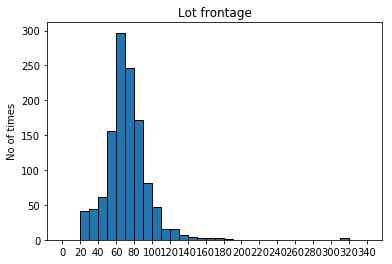

In [7]:
# Explore LotFrontage
print('Minimum:', new_df['LotFrontage'].min())
print('Maximum:', new_df['LotFrontage'].max())
print('Mean:', new_df['LotFrontage'].mean())
print('Median:', new_df['LotFrontage'].median())
print('Mode:', new_df['LotFrontage'].mode())

plt.hist(new_df['LotFrontage'], bins=range(0, 350, 10), ec='black')
plt.ylabel('No of times')
plt.title('Lot frontage')
plt.xticks(range(0, 350, 20))
plt.show()

From the histogram above, we can see that almost 300 values fro the LotFrontage lie between 60 and 70. The mean and median is almost the same. For this column, I take the mean to fill the NaN values. Taking median as value is also fine: I don't think it will make a big difference due to the proximity of these values and they are in the same bin in the histogram. 

Minimum: 0.0
Maximum: 1600.0
Mean: 103.68526170798899
Median: 0.0
Mode: 0    0.0
dtype: float64


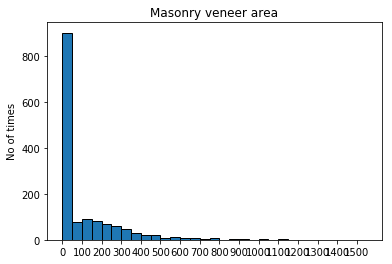

In [8]:
# Explore MasVnrArea
print('Minimum:', new_df['MasVnrArea'].min())
print('Maximum:', new_df['MasVnrArea'].max())
print('Mean:', new_df['MasVnrArea'].mean())
print('Median:', new_df['MasVnrArea'].median())
print('Mode:', new_df['MasVnrArea'].mode())

plt.hist(new_df['MasVnrArea'], bins=range(0, 1600, 50), ec='black')
plt.ylabel('No of times')
plt.title('Masonry veneer area')
plt.xticks(range(0, 1600, 100))
plt.show()

For the variable MasVnrArea, the mode and median are 0, which can be translated that the most frequent value and all the first half of the values of this column, if we sort it in an ascending order, is 0. For this column, we fill the missing values with 0.

In [9]:
# Explore MasVnrType
print('Number of missing values in MasVnrType:', new_df['MasVnrType'].isnull().sum())
print('Count of values in MasVnrType:')
print(new_df['MasVnrType'].value_counts())
print('--------------')

# Explore Electrical
print('Number of missing values in Electrical:', new_df['Electrical'].isnull().sum())
print('Count of values in Electrical:')
print(new_df['Electrical'].value_counts())

Number of missing values in MasVnrType: 8
Count of values in MasVnrType:
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
--------------
Number of missing values in Electrical: 1
Count of values in Electrical:
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


There are not many missing values in both categorical variables and there is a clear majority value in each variable, i.e. None in MasVnrType and SBrkr in Electrical. For this reason, we are just going to fill the missing values with the mode of each column. 
The remaining columns are filled in the code below.

In [10]:
# Fill remaining columns

new_df['LotFrontage'].fillna(new_df['LotFrontage'].mean(), inplace=True)

new_df['MasVnrArea'].fillna(0, inplace=True)
    
for other_cat in ['MasVnrType', 'Electrical']:
    new_df[other_cat].fillna(new_df[other_cat].mode()[0], inplace=True)

missing_values = new_df.isnull().any()  
print('Number of columns with missing values:', len(new_df.columns[missing_values==True].tolist()))

Number of columns with missing values: 0


### Encoding categorical variables

The common way of encoding them is one hot encoding where a new column is created and assigned to each categorical value. The problem with this method is that it makes the dataframe considerably wide.

One thing I observed is that there are different quality/conditions measurements for different columns. Some columns have ordinal numbers 1-10 and some have categorical values such as Ex, Gd, TA as quality rating. I proposed the idea to make a general dictionary for these quality measurements and with this, assign the categorical scores with numbers. For example, Gd is equal to Good which corresponds to 7 in the quality rating of column OverallQual.

In [11]:
df1 = new_df.select_dtypes(include='object')
print('Number of categorical columns before encoding:', len(df1.columns))

Number of categorical columns before encoding: 39


In [12]:
# Make dictionary for categorical variables and apply it to the new dataframe
cat_dict = {'Ex':'9',
           'Gd':'7',
           'TA':'5',
           'Fa':'3',
           'Po':'2',
           'No':'0'}

for dict_col in ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 
                 'FireplaceQu', 'GarageQual', 'GarageCond']:
    new_df[dict_col] = new_df[dict_col].map(cat_dict)
    new_df[dict_col] = new_df[dict_col].astype(str).astype(int)

In [20]:
df1 = new_df.select_dtypes(include='object')
print('Number of categorical columns after applying dictionary:', len(df1.columns))
print('Encoding the remaining categorical variables...', '\n')

# Apply one hot encoding for the remaining categorical variables
df1 = new_df
df_encoded = pd.get_dummies(df1) 
print('Shape of dataframe after encoding:', df_encoded.shape)

Number of categorical columns after applying dictionary: 30
Encoding the remaining categorical variables... 

Shape of dataframe after encoding: (1460, 227)


### Scaling

Missing values are filled, categorical variables are encoded... now it's time to scale the predictor variables. Scaling is necessary because...

First the target variable has to be separated from the predictors then the predictors are scaled using the StandardScaler.

In [28]:
x = df_encoded.drop(['SalePrice'], axis = 1)    
y = df_encoded['SalePrice']

x = StandardScaler().fit_transform(x)

/home/tria/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/tria/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Building regression models

